In [ ]:
"""
In this code, I have a theory on estimating the size of \tilde{\epsilon} by working through the entries of this matrix. Without prior knowledge of matrix A,
I assume it is likely that the individual entries of U_A, denoted u _{ij} will be of order(1/\sqrt{n}) and hence I shall used this to my advantage to estimate
the norm size of \tilde{\epsilon.
"""

Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]

Case 1 (perturb largest SV):
U^T V diagonal elements: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(I - U^T V)[0,0] = 0.000000
||(I - U^T V)||_2 = 1.999445

Case 2 (perturb smallest SV):
U^T V diagonal elements: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(I - U^T V)[9,9] = 0.000000
||(I - U^T V)||_2 = 1.999971


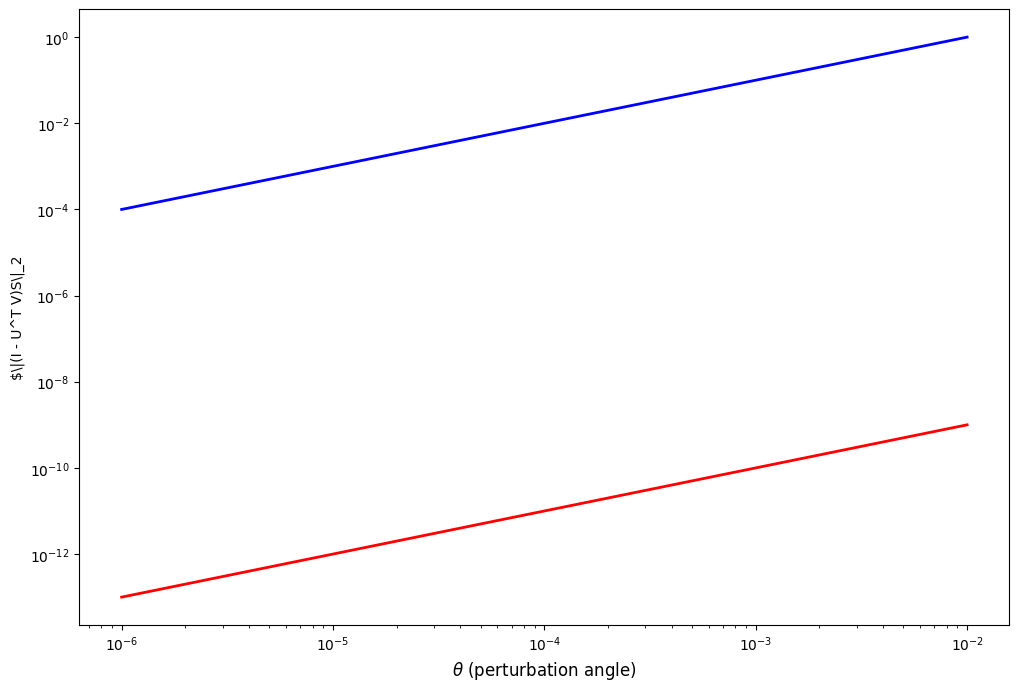

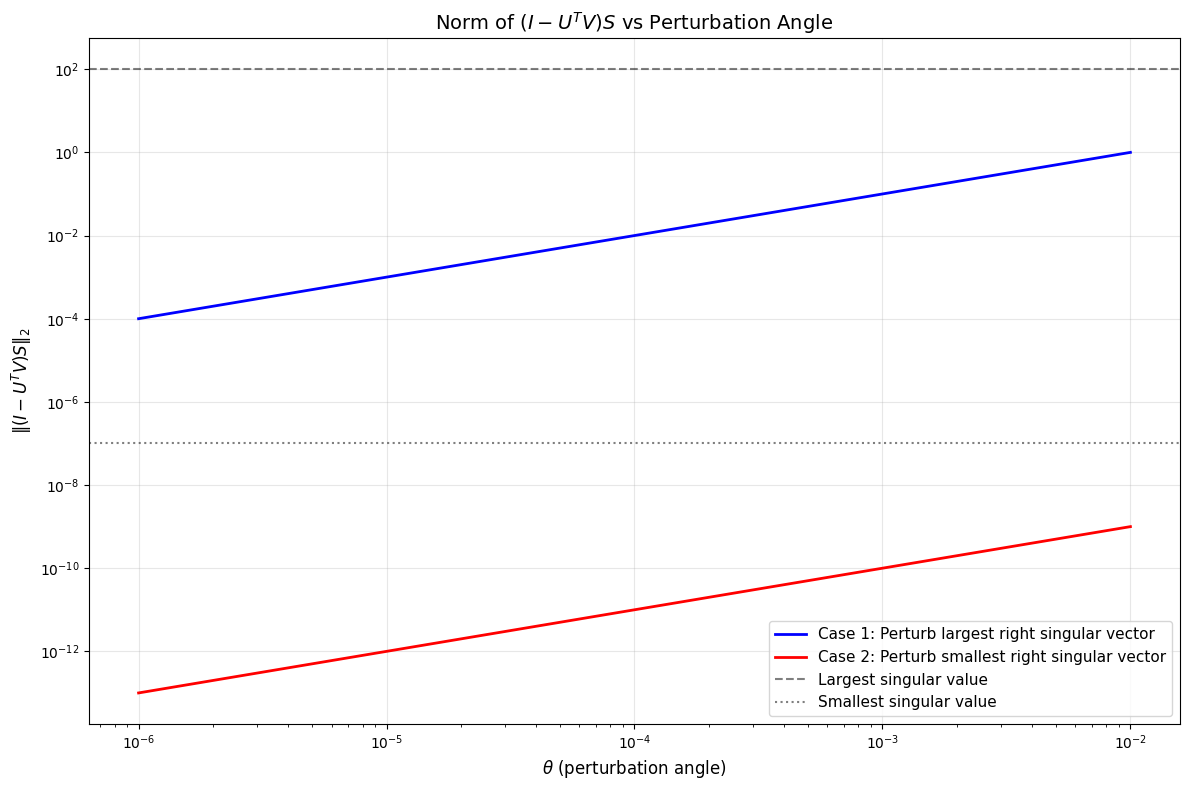


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


C:\Users\aleks\AppData\Local\Temp\ipykernel_35044\2997569051.py:126: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=11)


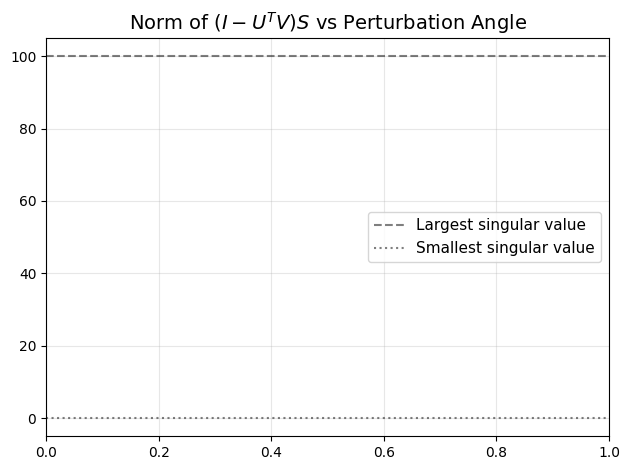


Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Expected behavior:
Case 1: ||(I - U^T V)S||_2 should be dominated by largest SV ≈ 1.00e+02
Case 2: ||(I - U^T V)S||_2 should be dominated by smallest SV ≈ 1.00e-07


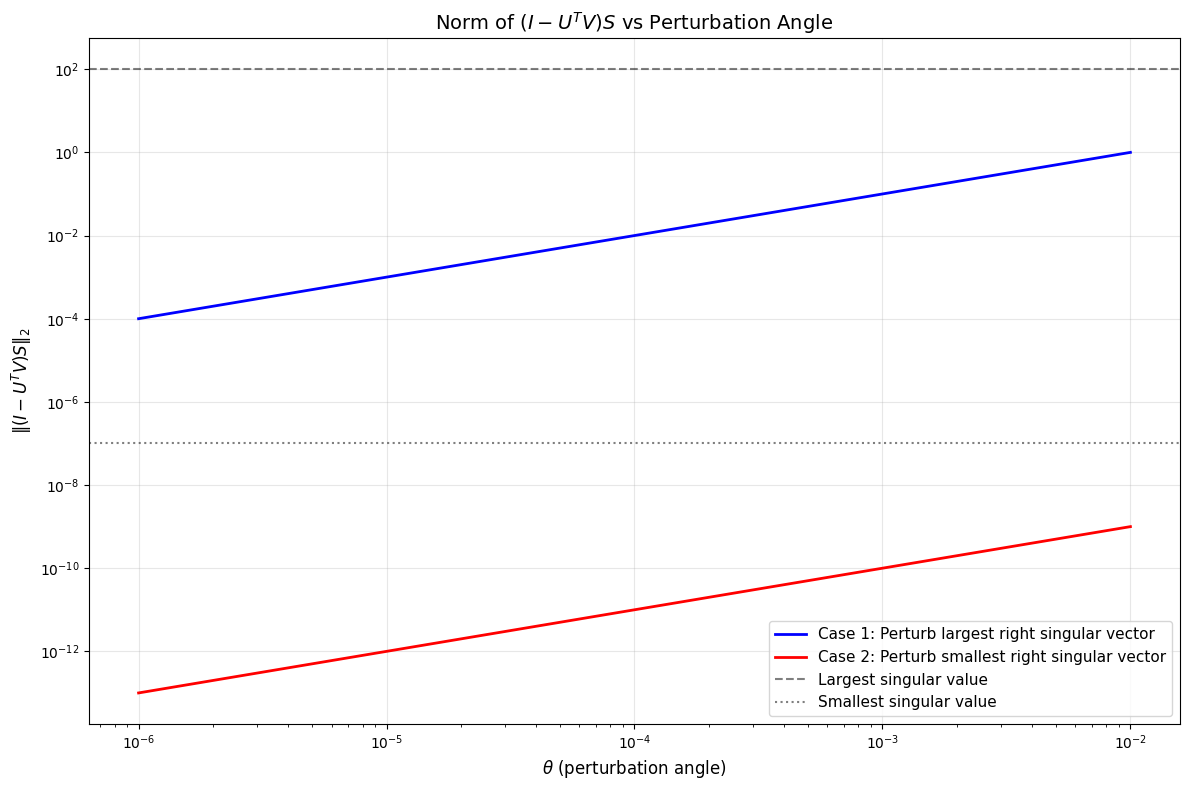


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


In [ ]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 100, 10
rng = np.random.default_rng(123)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

thetas = np.linspace(1e-6, 1e-2, 200)

# Store norms of (I - U^T V)S
norm_IUVS_A1, norm_IUVS_A2 = [], []

for theta in thetas:
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((n, 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)

    # Case 1: Perturb largest singular vector (col 0)
    V_A1 = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A1[:, [0]] = c * U_A[:, [0]] + s * z
    V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
    
    # For full SVD, we only need to look at the r×r block
    # (I - U^T V) will be block diagonal: [r×r block, 0; 0, I]
    # So we can just work with the r×r matrices
    UtV1_rr = U_A.T @ V_A1  # This is r×r
    I_r = np.eye(r)
    I_minus_UtV1_rr = I_r - UtV1_rr
    I_minus_UtV1_S_rr = I_minus_UtV1_rr @ S_A  # r×r operation
    norm_IUVS_A1.append(np.linalg.norm(I_minus_UtV1_S_rr, ord=2))
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 1 (perturb largest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV1_rr)}")
        print(f"(I - U^T V)[0,0] = {I_minus_UtV1_rr[0,0]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV1_rr, ord=2):.6f}")

    # Case 2: Perturb smallest singular vector (col -1)
    V_A2 = U_A.copy()
    V_A2[:, [-1]] = c * U_A[:, [-1]] + s * z
    V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
    
    # Again, work with r×r matrices
    UtV2_rr = U_A.T @ V_A2  # This is r×r
    I_minus_UtV2_rr = I_r - UtV2_rr
    I_minus_UtV2_S_rr = I_minus_UtV2_rr @ S_A  # r×r operation
    norm_IUVS_A2.append(np.linalg.norm(I_minus_UtV2_S_rr, ord=2))
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 2 (perturb smallest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV2_rr)}")
        print(f"(I - U^T V)[{r-1},{r-1}] = {I_minus_UtV2_rr[r-1,r-1]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV2_rr, ord=2):.6f}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2')

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")

plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nLargest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

print(f"\nExpected behavior:")
print(f"Case 1: ||(I - U^T V)S||_2 should be dominated by largest SV ≈ {sing_vals_A[0]:.2e}")
print(f"Case 2: ||(I - U^T V)S||_2 should be dominated by smallest SV ≈ {sing_vals_A[-1]:.2e}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")

Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]

Case 1 (perturb largest SV):
U^T V diagonal elements: [0.9999995 1.        1.        1.        1.        1.        1.
 1.        1.        1.       ]
(I - U^T V)[0,0] = 0.000000
||(I - U^T V)||_2 = 0.000000

Case 2 (perturb smallest SV):
U^T V diagonal elements: [1.        1.        1.        1.        1.        1.        1.
 1.        1.        0.9999995]
(I - U^T V)[9,9] = 0.000000
||(I - U^T V)||_2 = 0.000000


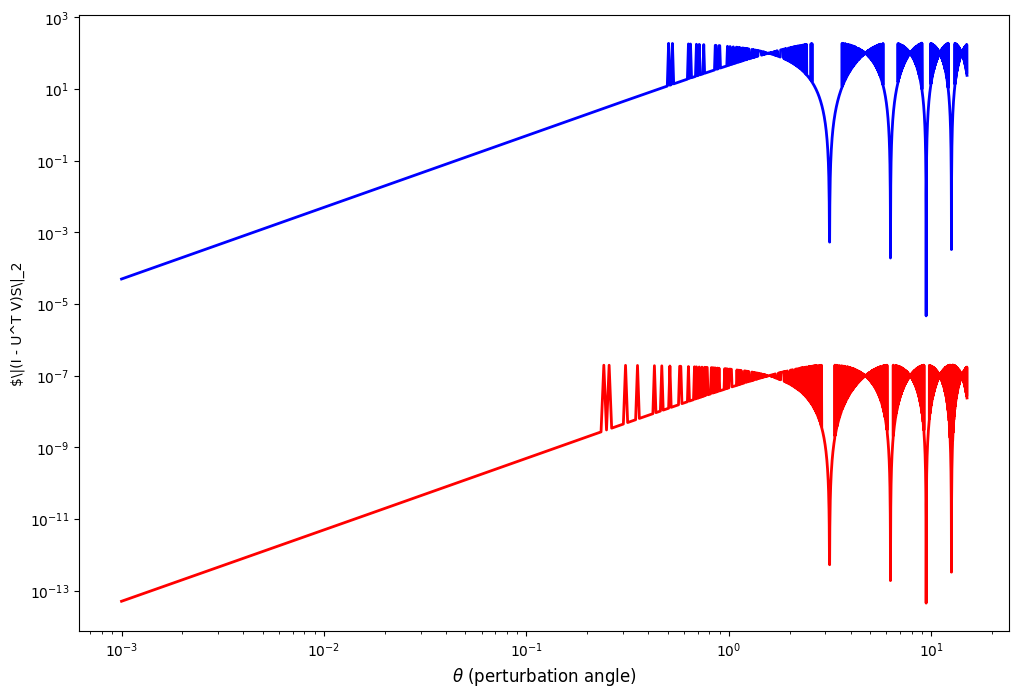

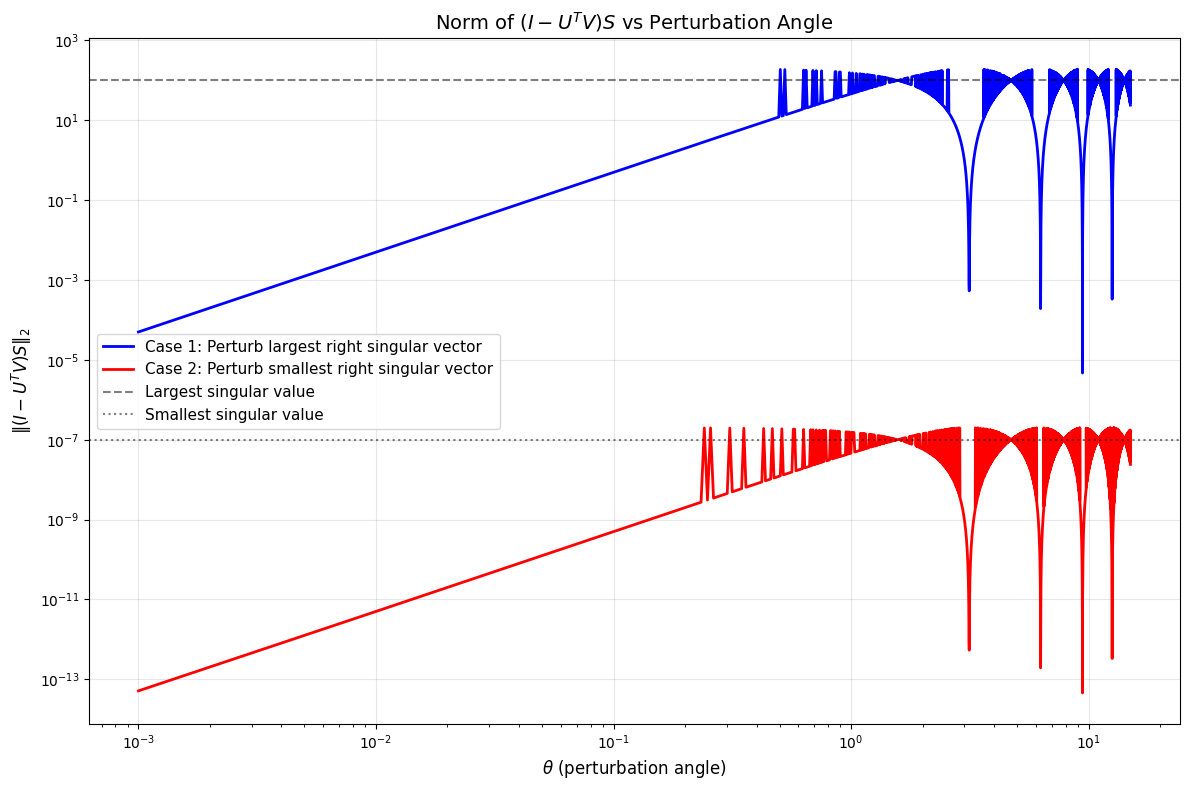


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.50e+01:
Case 1 (largest SV): 2.40e+01
Case 2 (smallest SV): 2.40e-08

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


In [ ]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 100, 10
rng = np.random.default_rng(123)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

thetas = np.linspace(1e-3, 15, 2000)

# Store norms of (I - U^T V)S
norm_IUVS_A1, norm_IUVS_A2 = [], []

for theta in thetas:
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((n, 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)

    # Case 1: Perturb largest singular vector (col 0)
    V_A1 = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A1[:, [0]] = c * U_A[:, [0]] + s * z
    V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
    
    # For full SVD, we only need to look at the r×r block
    # (I - U^T V) will be block diagonal: [r×r block, 0; 0, I]
    # So we can just work with the r×r matrices
    UtV1_rr = U_A.T @ V_A1  # This is r×r
    I_r = np.eye(r)
    I_minus_UtV1_rr = I_r - UtV1_rr
    I_minus_UtV1_S_rr = I_minus_UtV1_rr @ S_A  # r×r operation
    norm_IUVS_A1.append(np.linalg.norm(I_minus_UtV1_S_rr, ord=2))#################################
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 1 (perturb largest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV1_rr)}")
        print(f"(I - U^T V)[0,0] = {I_minus_UtV1_rr[0,0]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV1_rr, ord=2):.6f}")################

    # Case 2: Perturb smallest singular vector (col -1)
    V_A2 = U_A.copy()
    V_A2[:, [-1]] = c * U_A[:, [-1]] + s * z
    V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
    
    # Again, work with r×r matrices
    UtV2_rr = U_A.T @ V_A2  # This is r×r
    I_minus_UtV2_rr = I_r - UtV2_rr
    I_minus_UtV2_S_rr = I_minus_UtV2_rr @ S_A  # r×r operation
    norm_IUVS_A2.append(np.linalg.norm(I_minus_UtV2_S_rr, ord=2))#################################
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 2 (perturb smallest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV2_rr)}")
        print(f"(I - U^T V)[{r-1},{r-1}] = {I_minus_UtV2_rr[r-1,r-1]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV2_rr, ord=2):.6f}")################

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2')

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")


Singular values: [1.00000000e+02 3.59381366e+01 1.29154967e+01 4.64158883e+00
 1.66810054e+00 5.99484250e-01 2.15443469e-01 7.74263683e-02
 2.78255940e-02 1.00000000e-02]

Analyzing column 0...

Column 0 perturbation:
U^T V diagonal elements: [0.99500417 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
(I - U^T V)[0,0] = 0.004996
||(I - U^T V)||_2 = 0.004996

Analyzing column 1...

Analyzing column 2...

Analyzing column 3...

Analyzing column 4...

Analyzing column 5...

Analyzing column 6...

Analyzing column 7...

Analyzing column 8...

Analyzing column 9...

ALL COLUMNS PERTURBED by θ=0.1000
U^T V diagonal elements: [0.99500417 0.99505359 0.99510204 0.99514956 0.99519616 0.99524187
 0.99528673 0.99533074 0.99537394 0.99541635]
||(I - U^T V)||_2 = 0.065014


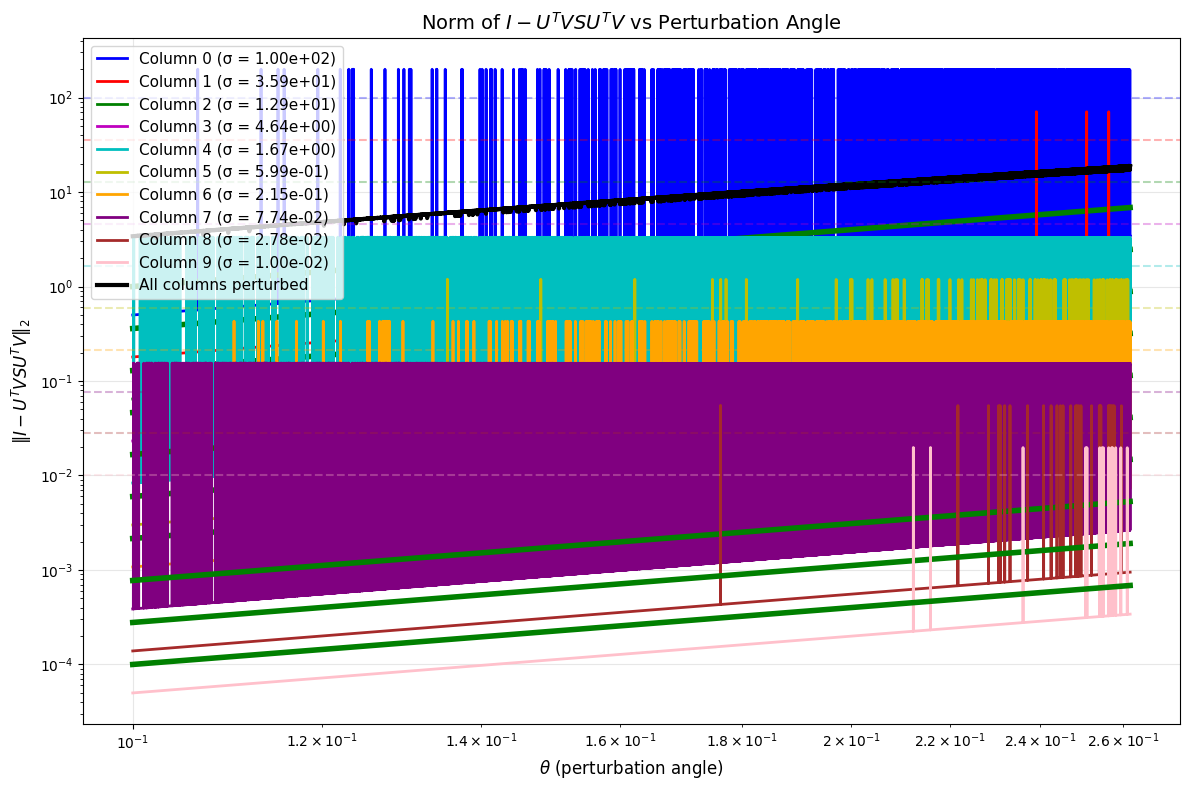


ALL COLUMNS PERTURBED by θ=0.1000
U^T V diagonal elements: [0.99500417 0.99505359 0.99510204 0.99514956 0.99519616 0.99524187
 0.99528673 0.99533074 0.99537394 0.99541635]
||(I - U^T V)||_2 = 0.065014


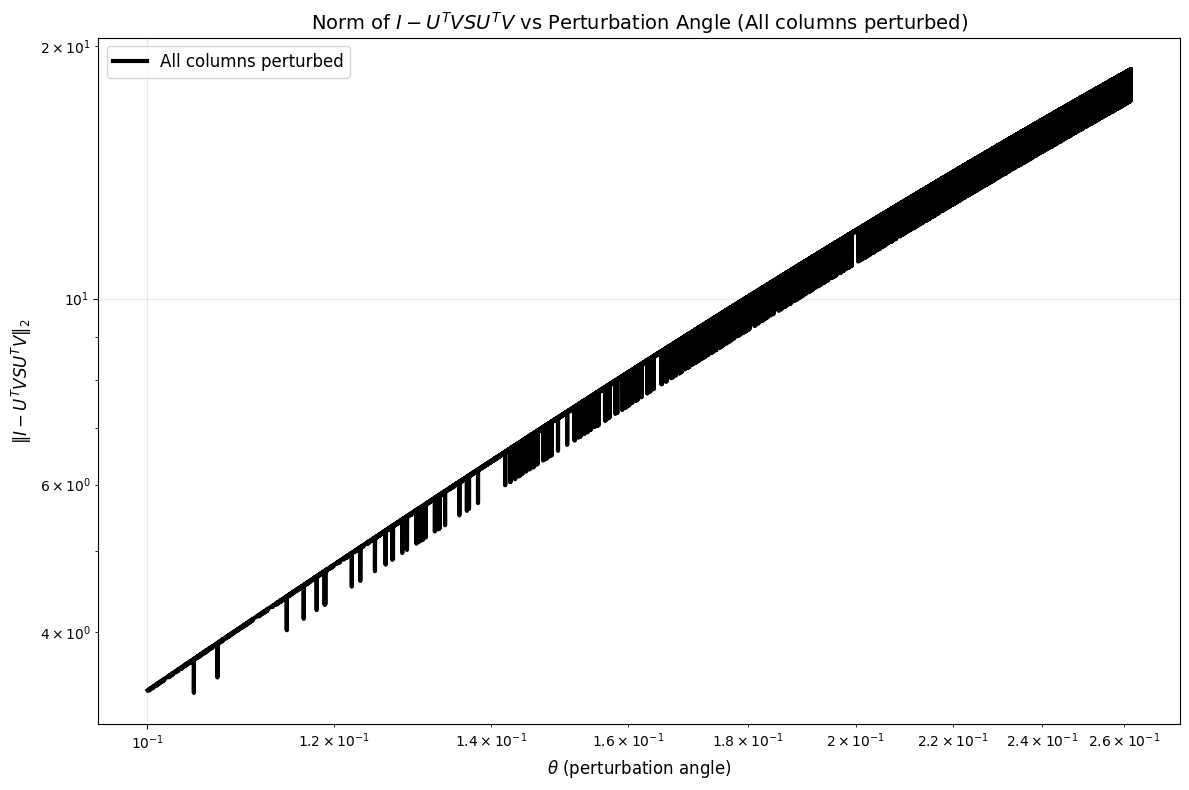


Singular values: [1.00000000e+02 3.59381366e+01 1.29154967e+01 4.64158883e+00
 1.66810054e+00 5.99484250e-01 2.15443469e-01 7.74263683e-02
 2.78255940e-02 1.00000000e-02]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-02
Condition number: 1.00e+04
gradient of all columns perturbed:  1.7734277014671305

Final norms at theta = 2.62e-01:
Column 0 (σ = 1.00e+02): 3.41e+00
Column 1 (σ = 3.59e+01): 1.22e+00
Column 2 (σ = 1.29e+01): 4.40e-01
Column 3 (σ = 4.64e+00): 1.58e-01
Column 4 (σ = 1.67e+00): 5.68e-02
Column 5 (σ = 5.99e-01): 2.04e-02
Column 6 (σ = 2.15e-01): 7.34e-03
Column 7 (σ = 7.74e-02): 1.52e-01
Column 8 (σ = 2.78e-02): 9.48e-04
Column 9 (σ = 1.00e-02): 3.41e-04

Theoretical insights:
Column 0 perturbation:
  - Corresponding singular value: 1.00e+02
  - Expected norm for small perturbations: ≈ 1.00e+02
Column 1 perturbation:
  - Corresponding singular value: 3.59e+01
  - Expected norm for small perturbations: ≈ 3.59e+01
Column 2 perturbation:
  - Corresponding s

In [18]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 200, 10
rng = np.random.default_rng(42)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-2, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

def perturb_column_and_compute_norm(U_A, S_A, col_idx, theta, rng, debug=False):
    """
    Perturb a specific column of U_A and compute ||(I - U^T V)S||_2
    
    Parameters:
    - U_A: n×r matrix with orthonormal columns
    - S_A: r×r diagonal matrix of singular values
    - col_idx: index of column to perturb (0 to r-1, or negative indexing)
    - theta: perturbation angle
    - rng: random number generator
    - debug: whether to print debug information
    
    Returns:
    - norm of (I - U^T V)S
    """
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((U_A.shape[0], 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)
    
    # Perturb the specified column
    V_A = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A[:, [col_idx]] = c * U_A[:, [col_idx]] + s * z
    V_A, _ = scipy.linalg.qr(V_A, mode="economic")
    
    # Compute (I - U^T V)S
    r = U_A.shape[1]
    UtV_rr = U_A.T @ V_A  # This is r×r
    I_r = np.eye(r)
    I_minus_UtV_rr = I_r - UtV_rr
    I_minus_UtV_S_rr = I_minus_UtV_rr @ S_A  # r×r operation
    norm_result = np.linalg.norm(I_minus_UtV_S_rr, ord='fro')
    
    # Debug information
    if debug:
        print(f"\nColumn {col_idx} perturbation:")
        print(f"U^T V diagonal elements: {np.diag(UtV_rr)}")
        print(f"(I - U^T V)[{col_idx},{col_idx}] = {I_minus_UtV_rr[col_idx,col_idx]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV_rr, ord='fro'):.6f}")
    
    return norm_result

def perturb_all_columns_and_compute_norm(U_A, S_A, theta, rng, debug=False):
    """
    Perturb *all* columns of U_A by angle theta toward the same z, then compute ||(I - U^T V)S||_2
    """
    n, r = U_A.shape
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((n, 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)

    V_A = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    # Perturb every column by the same angle theta
    for j in range(r):
        V_A[:, [j]] = c * U_A[:, [j]] + s * z
    V_A, _ = scipy.linalg.qr(V_A, mode="economic")

    r = U_A.shape[1]
    UtV_rr = U_A.T @ V_A
    I_r = np.eye(r)
    I_minus_UtV_rr = I_r - UtV_rr
    I_minus_UtV_S_rr = S_A - UtV_rr @ S_A @ UtV_rr
    norm_result = np.linalg.norm(I_minus_UtV_S_rr, ord='fro')

    # Debug information
    if debug:
        print(f"\nALL COLUMNS PERTURBED by θ={theta:.4f}")
        print(f"U^T V diagonal elements: {np.diag(UtV_rr)}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV_rr, ord='fro'):.6f}")

    

    return norm_result

# Define which columns to analyze
# You can modify this list to include any columns you want
#columns_to_analyze = [0, -1]  # Start with original: largest and smallest
# columns_to_analyze = [0, 1, 2, -3, -2, -1]  # Example: first 3 and last 3
columns_to_analyze = list(range(r))  # All columns

thetas = np.linspace(1e-1, np.pi / 12, 20000)

# Store results for each column
results = {}
colors = ['b', 'r', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', 'pink']

for i, col_idx in enumerate(columns_to_analyze):
    print(f"\nAnalyzing column {col_idx}...")
    norms = []
    
    for j, theta in enumerate(thetas):
        # Debug only for first theta and first column
        debug = (j == 0 and i == 0)
        norm_val = perturb_column_and_compute_norm(U_A, S_A, col_idx, theta, rng, debug)
        norms.append(norm_val)
    
    results[col_idx] = norms

# Create the plot
plt.figure(figsize=(12, 8))

norms_all = []
for j, theta in enumerate(thetas):
    debug = (j == 0)
    norm_val = perturb_all_columns_and_compute_norm(U_A, S_A, theta, rng, debug)
    norms_all.append(norm_val)


 

for i, col_idx in enumerate(columns_to_analyze):
    color = colors[i % len(colors)]
    # Handle negative indexing for labels
    actual_idx = col_idx if col_idx >= 0 else r + col_idx
    label = f'Column {col_idx} (σ = {sing_vals_A[actual_idx]:.2e})'
    plt.loglog(thetas, results[col_idx], color=color, linestyle='-', 
               label=label, linewidth=2)
    plt.loglog(thetas, sing_vals_A[actual_idx] * thetas**2, color = 'g', linewidth = 4)
plt.loglog(thetas, norms_all, color='k', label='All columns perturbed', linewidth=3)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|I - U^T VS U^TV\|_2$', fontsize=12)
plt.title('Norm of $I - U^T VS U^TV$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for all singular values being analyzed
for i, col_idx in enumerate(columns_to_analyze):
    actual_idx = col_idx if col_idx >= 0 else r + col_idx
    plt.axhline(y=sing_vals_A[actual_idx], color=colors[i % len(colors)], 
                linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

norms_all = []
for j, theta in enumerate(thetas):
    debug = (j == 0)
    norm_val = perturb_all_columns_and_compute_norm(U_A, S_A, theta, rng, debug)
    norms_all.append(norm_val)




plt.figure(figsize=(12, 8))
plt.loglog(thetas, norms_all, color='k', label='All columns perturbed', linewidth=3)
plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|I - U^T V S U^TV\|_2$', fontsize=12)
plt.title('Norm of $I - U^T V S U^TV$ vs Perturbation Angle (All columns perturbed)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

gradient = (np.log(norms_all[-1]) - np.log(norms_all[0])) / (np.log(thetas[-1]) - np.log(thetas[0]))

print("gradient of all columns perturbed: ", gradient)

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
for col_idx in columns_to_analyze:
    actual_idx = col_idx if col_idx >= 0 else r + col_idx
    print(f"Column {col_idx} (σ = {sing_vals_A[actual_idx]:.2e}): {results[col_idx][final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
for col_idx in columns_to_analyze:
    actual_idx = col_idx if col_idx >= 0 else r + col_idx
    print(f"Column {col_idx} perturbation:")
    print(f"  - Corresponding singular value: {sing_vals_A[actual_idx]:.2e}")
    print(f"  - Expected norm for small perturbations: ≈ {sing_vals_A[actual_idx]:.2e}")

Definitely have a look at the root cause of the small angle spikes, or alternatively make sure you write about it as possibvle further study in the conclusion lol



In [17]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 100, 10
rng = np.random.default_rng(123)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

def perturb_column_and_compute_norm(U_A, S_A, col_idx, theta, rng, debug=False):
    """
    Perturb a specific column of U_A and compute ||(I - U^T V)S||_2
    
    Parameters:
    - U_A: n×r matrix with orthonormal columns
    - S_A: r×r diagonal matrix of singular values
    - col_idx: index of column to perturb (0 to r-1, or negative indexing)
    - theta: perturbation angle
    - rng: random number generator
    - debug: whether to print debug information
    
    Returns:
    - norm of (I - U^T V)S
    """
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((U_A.shape[0], 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)
    
    # Perturb the specified column
    V_A = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A[:, [col_idx]] = c * U_A[:, [col_idx]] + s * z
    V_A, _ = scipy.linalg.qr(V_A, mode="economic")

    # Find A n by n matrix
    A = U_A @ S_A @ V_A.T

    #Find symmetric matrix
    A_s = U_A @ S_A @ U_A.T

    #calculate \tilde{\epsilon}
    epsilon = A - A.T

    X = np.random.randn(n, r)

    AsX = A_s @ X
    AX = A @ X

    one = (AsX) @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    Q_1, R_1 = np.linalg.qr(AsX, 'complete')

    two = (Q_1 @ R_1) @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    three = R_1 @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    four = np.linalg.pinv(X.T @ Q_1) @ (X.T @ Q_1) @ R_1 @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T  ## this i sthe perilous step

    five = np.linalg.pinv(X.T @ Q_1) @ (X.T @ AsX) @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    six = np.linalg.pinv(X.T @ Q_1) @ (0.5 * epsilon @ X).T

    print(np.linalg.norm(one,2))
    print(np.linalg.norm(two,2))
    print(np.linalg.norm(three,2))
    print(np.linalg.norm(four,2))
    print(np.linalg.norm(five,2))
    print(np.linalg.norm(six,2))

thetas = np.linspace(1, 2, 1)

# Store results for each column
results = {}
colors = ['b', 'r', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', 'pink']

for i, col_idx in enumerate(columns_to_analyze):
    print(f"\nAnalyzing column {col_idx}...")
    norms = []
    
    for j, theta in enumerate(thetas):
        # Debug only for first theta and first column
        debug = (j == 0 and i == 0)
        norm_val = perturb_column_and_compute_norm(U_A, S_A, col_idx, theta, rng, debug)
        norms.append(norm_val)



Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]

Analyzing column 0...
195.46930711027684
195.46930761155554
195.46931080039334
15.008565112635996
15.008564283201654
15.0085642976499

Analyzing column 1...
20.323452972966777
20.32345279468391
20.323452865925027
1.438741526632223
1.4387416723861017
1.4387407299302144

Analyzing column 2...
9.10111579993211
9.101115863512943
9.101114191145026
0.14898977597875002
0.14898983520316333
0.14898997288170512

Analyzing column 3...
0.3491766892082337
0.34917668897842774
0.34917668932893736
0.015915336844002127
0.01591533765744256
0.015915337988015175

Analyzing column 4...
0.038126965365575076
0.03812696475123705
0.03812696465087617
0.0018447773048233182
0.001844777662649578
0.001844777211945848

Analyzing column 5...
0.08598835641891865
0.08598791065492122
0.08598782305787935
0.00014884024518975488
0.00014879177312065157
0.00014879872633914555

Analyzing column 6...
0.0016486819951881263
0.00164868242131

In [45]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 100, 10
rng = np.random.default_rng(123)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

def perturb_column_and_compute_norm(U_A, S_A, col_idx, theta, rng, debug=False):
    """
    Perturb a specific column of U_A and compute various norms
    
    Parameters:
    - U_A: n×r matrix with orthonormal columns
    - S_A: r×r diagonal matrix of singular values
    - col_idx: index of column to perturb (0 to r-1, or negative indexing)
    - theta: perturbation angle
    - rng: random number generator
    - debug: whether to print debug information
    
    Returns:
    - dictionary with all computed norms
    """
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((U_A.shape[0], 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)
    
    # Perturb the specified column
    V_A = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A[:, [col_idx]] = c * U_A[:, [col_idx]] + s * z
    V_A, _ = scipy.linalg.qr(V_A, mode="economic")

    # Find A n by n matrix
    A = U_A @ S_A @ V_A.T

    # Find symmetric matrix
    A_s = U_A @ S_A @ U_A.T

    # calculate \tilde{\epsilon}
    epsilon = A - A.T

    X = np.random.randn(n, r)

    AsX = A_s @ X
    AX = A @ X

    one = (AsX) @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    Q_1, R_1 = np.linalg.qr(AsX, 'reduced')

    two = (Q_1 @ R_1) @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    three = R_1 @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    four = np.linalg.pinv(X.T @ Q_1) @ (X.T @ Q_1) @ R_1 @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T  ## this is the perilous step

    five = np.linalg.pinv(X.T @ Q_1) @ (X.T @ AsX) @ np.linalg.inv(X.T @ AsX) @ (0.5 * epsilon @ X).T

    six = np.linalg.pinv(X.T @ Q_1) @ (0.5 * epsilon @ X).T

    C = AsX @ np.linalg.inv(X.T @ AsX)

    seven = C @ (0.5 * epsilon @ X).T + (0.5 * epsilon @ X) @ C.T - C @ (0.5 * X.T @ epsilon @ X) @ C.T

    eight = C @ (0.5 * epsilon @ X).T + (0.5 * epsilon @ X) @ C.T - C @ X.T @ (0.5 * epsilon @ X) @ C.T

    nine = C @ (0.5 * epsilon @ X).T + (np.eye(n) - C @ X.T) @ (0.5 * epsilon @ X) @ C.T

    ten = np.linalg.pinv(X.T@ Q_1) @ (X.T @ Q_1)#(Q_1.T @ X) @ np.linalg.pinv(Q_1.T @ X) # make sure of size 1

    eleven = R_1 @ ten # cf iwth twelve

    twelve = R_1 #cf with eleven

    #thirteen = (0.5 * np.linalg.pinv(Q_1) @ np.linalg.pinv(X.T) @ X.T @ epsilon.T) + (np.eye(n) - np.linalg.pinv(Q_1)@np.linalg.pinv(X.T)@(X.T)) @ (0.5 * epsilon @ X) @ np.linalg.pinv(X) @ np.linalg.pinv(Q_1.T)

    fourteen = (np.eye(n) - (AsX @ np.linalg.pinv(AsX) @ np.linalg.pinv(X.T) @ X.T))

    fifteen = epsilon
    
    sixteen = 0.5 * (np.linalg.inv(X.T @ Q_1) @ X.T @ epsilon.T)

    norms = {
        'one': np.linalg.norm(one, 2),
        'two': np.linalg.norm(two, 2),
        'three': np.linalg.norm(three, 2),
        'four': np.linalg.norm(four, 2),
        'five': np.linalg.norm(five, 2),
        'six': np.linalg.norm(six, 2),
        'seven': np.linalg.norm(seven, 2),
        'eight': np.linalg.norm(eight, 2),
        'nine': np.linalg.norm(nine, 2),
        'ten': np.linalg.norm(ten,2),
        'eleven': np.linalg.norm(eleven,2),
        'twelve': np.linalg.norm(twelve,2),
        #'thirteen': np.linalg.norm(thirteen,2),
        'fourteen': np.linalg.norm(fourteen,2),
        'fifteen': np.linalg.norm(fifteen,2),
        'sixteen': np.linalg.norm(sixteen,2)

    }
    
    if debug:
        print(f"Norm values for theta={theta:.3f}, column={col_idx}:")
        for key, value in norms.items():
            print(f"  {key}: {value:.6e}")
    
    return norms

# Test with one theta value and one column
theta_test = 1.5
col_test = 0

print(f"\nTesting with theta={theta_test}, column={col_test}:")
result_norms = perturb_column_and_compute_norm(U_A, S_A, col_test, theta_test, rng, debug=True)

# If you want to test multiple columns for the same theta:
print(f"\nComparing across different columns for theta={theta_test}:")
test_columns = [0, 1, 2, -1]  # Test first few and last column

for col in test_columns:
    if abs(col) < r:  # Ensure valid column index
        norms = perturb_column_and_compute_norm(U_A, S_A, col, theta_test, rng, debug=False)
        print(f"Column {col}: one={norms['one']:.2e}, two={norms['two']:.2e}, "
              f"three={norms['three']:.2e}, four={norms['four']:.2e}, "
              f"five={norms['five']:.2e}, six={norms['six']:.2e}, seven ={norms['seven']:.2e}, eight={norms['eight']:.2e}, nine={norms['nine']:.2e}, ten={norms['ten']:.2e}, eleven={norms['eleven']:.2e}, twelve={norms['twelve']:.2e}, /fourteen={norms['fourteen']:.2e}, fifteen={norms['fourteen']:.2e}, sixteen={norms['sixteen']:.2e}")# thirteen={norms['thirteen']:.2e}")

Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]

Testing with theta=1.5, column=0:
Norm values for theta=1.500, column=0:
  one: 2.729223e+03
  two: 2.729223e+03
  three: 2.729223e+03
  four: 2.729222e+03
  five: 2.729168e+03
  six: 2.729162e+03
  seven: 5.458657e+03
  eight: 5.458657e+03
  nine: 5.458657e+03
  ten: 1.000000e+00
  eleven: 2.746298e+02
  twelve: 2.746298e+02
  fourteen: 1.150202e+00
  fifteen: 9.974950e+01
  sixteen: 2.729162e+03

Comparing across different columns for theta=1.5:
Column 0: one=2.48e+02, two=2.48e+02, three=2.48e+02, four=2.48e+02, five=2.48e+02, six=2.48e+02, seven =4.98e+02, eight=4.98e+02, nine=4.98e+02, ten=1.00e+00, eleven=4.40e+02, twelve=4.40e+02, /fourteen=1.15e+00, fifteen=1.15e+00, sixteen=2.48e+02
Column 1: one=1.14e+02, two=1.14e+02, three=1.14e+02, four=1.14e+02, five=1.14e+02, six=1.14e+02, seven =2.27e+02, eight=2.27e+02, nine=2.27e+02, ten=1.00e+00, eleven=4.37e+02, twelve=4.37e+02, /fourteen=1.15e